In [1]:
# Import libraries
import os
import sys

import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Check virtual environment: should be: '/Users/James/anaconda3/envs/mimic/bin/python'
sys.executable

'/Users/James/anaconda3/envs/mimic/bin/python'

In [3]:
# Set up paths
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src_folder = os.path.join(project_root, 'src')

In [4]:
# Import src functions
sys.path.insert(0, src_folder)
from modeling import *
from stats_and_visualisations import *

In [ ]:
### ---- PARAMETERS
iterations_per_model = 100

In [ ]:
# Import data
train = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'data', 'acute_respiratory_failure_train.csv')),index_col=0)
print('--> Importing done')

--> Importing done


In [ ]:
X_train, y_train = final_cleaning(ids = ['subject_id', 'hadm_id'], target = 'target', train = train)
print('--> Cleaning done')

--> Cleaning done


## Define functions

In [ ]:
def run_random_search(model, random_grid, scoring, cv, n_iter, X_train, y_train):
    
    # Use the random grid to search for best hyperparameters
    m = model
    print('--> Model defined')

    random_search_model = RandomizedSearchCV(estimator = m, scoring=scoring,
                                   param_distributions = random_grid,
                                   n_iter = n_iter, cv = cv, verbose=0,
                                   random_state=8, n_jobs = -1,
                                   return_train_score=True)
    print('--> Random search defined')

    # Fit the random search model
    random_search_model.fit(X_train, y_train)
    print('--> Fitting done')

    # Print the best CV score
    print('--> Best CV Score: ', random_search_model.best_score_)
    
    return random_search_model

In [ ]:
def visualise_results(random_grid, random_search_model, training_score, cv_score, fit_time):
    
    # Clean the CV results df, keeping only columns that are needed
    keep_cols = ['param_{}'.format(param) for param in random_grid.keys()]
    keep_cols = keep_cols + [training_score, cv_score, fit_time]
    results = pd.DataFrame(random_search_model.cv_results_)[keep_cols]

    # Visualise best CV score by run
    best_cv_by_run(results, cv_score)

    # Visualise the scores by single hyperparameters
    plot_single_results(results, training_score, cv_score, fit_time)

    # Visualise the scores by double hyperparameters
    plot_double_results(results, [training_score, cv_score, fit_time])

    results.sort_values(by=cv_score, ascending=False, inplace=True)
    
    return results

## Logistic regression

In [ ]:
C = list(np.arange(0.01, 5, 0.01))
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Create the random grid
logistic_random_grid = {'C': C,
                        'solver': solver}

print('--> Grid defined')

--> Grid defined


In [ ]:
# Run the random search model
logistic_random_search_model = run_random_search(model=LogisticRegression(class_weight='balanced'),
                                        random_grid=logistic_random_grid,
                                        scoring='roc_auc', cv=4, n_iter=iterations_per_model, 
                                        X_train=X_train, y_train=y_train)

--> Model defined
--> Random search defined
--> Fitting done
--> Best CV Score:  0.74630268928311


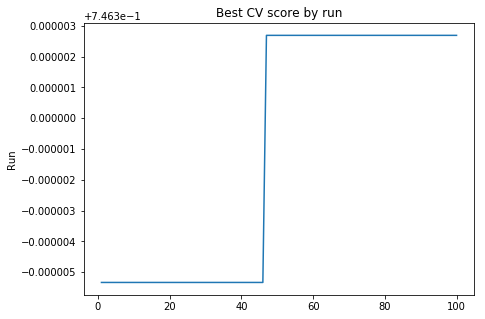

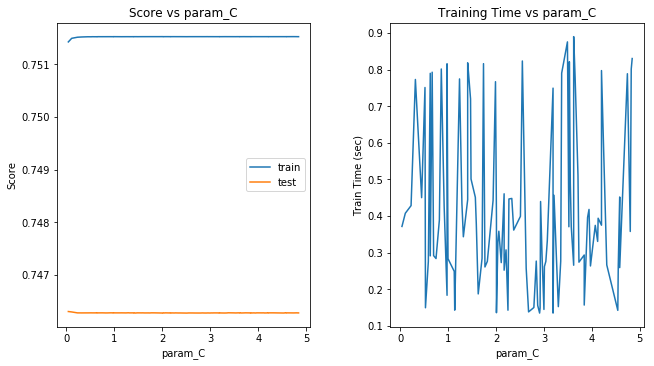

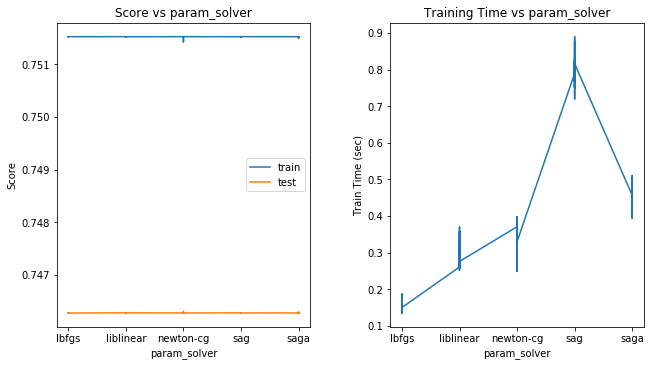

param_C and param_solver


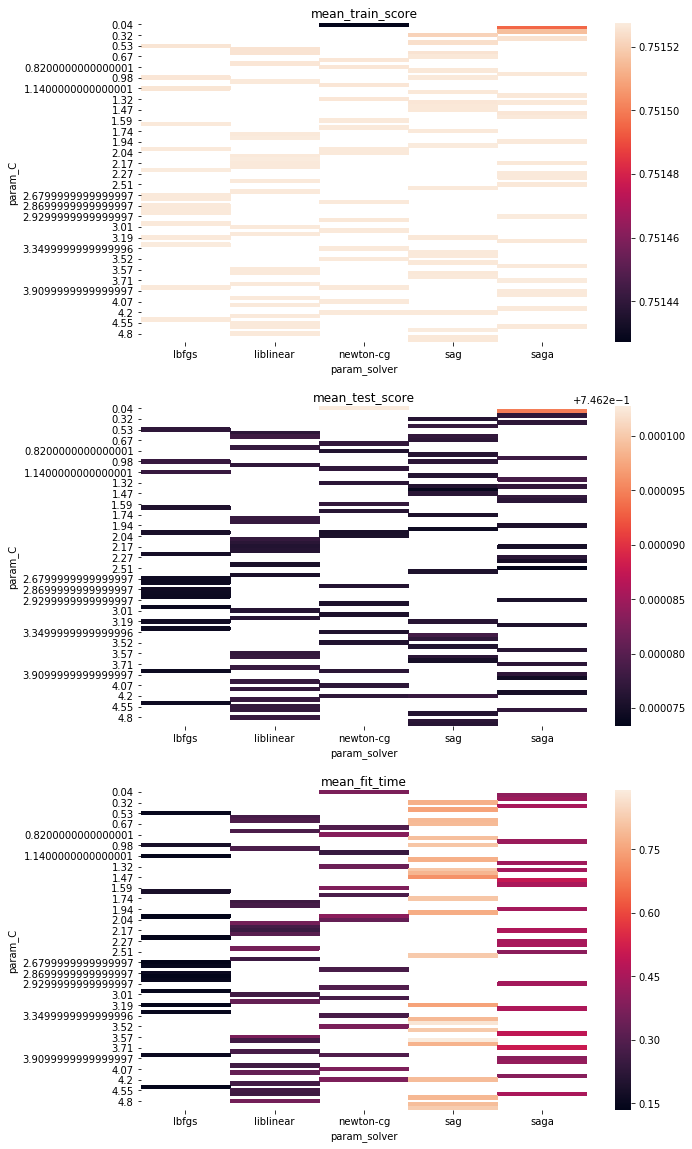

,param_C,param_solver,mean_train_score,mean_test_score,mean_fit_time
46,0.04,newton-cg,0.751427,0.746303,0.371361
0,0.11,saga,0.751495,0.746295,0.407394
54,1.29,saga,0.751526,0.746279,0.433704
28,3.37,sag,0.751527,0.746279,0.790506
19,0.63,liblinear,0.751525,0.746278,0.290934
85,0.92,saga,0.751527,0.746278,0.425112
70,1.77,liblinear,0.751527,0.746278,0.260601
45,3.73,liblinear,0.751527,0.746278,0.273734
39,0.98,lbfgs,0.751526,0.746278,0.183181
81,1.14,lbfgs,0.751526,0.746278,0.142621


<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualise the results to find optimal hyperparameters
logistic_results = visualise_results(random_grid=logistic_random_grid, random_search_model=logistic_random_search_model,
                            training_score='mean_train_score', cv_score='mean_test_score', fit_time='mean_fit_time')
logistic_results

## Random Forest

In [ ]:
# define the grid search parameters
n_estimators = list(np.arange(20, 3000, 5))
max_features = list(np.arange(2, X_train.shape[1]))
max_depth = list(np.arange(1, 100))
max_depth.append(None)
min_samples_split = list(np.arange(2, 250))
min_samples_leaf = list(np.arange(1, 250))
bootstrap = [True, False]

# Create the random grid
rf_random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

print('--> Grid defined')

--> Grid defined


In [ ]:
# Run the random search model
rf_random_search_model = run_random_search(model=RandomForestRegressor(), random_grid=rf_random_grid,
                                        scoring='roc_auc', cv=4, n_iter=iterations_per_model, 
                                        X_train=X_train, y_train=y_train)

--> Model defined
--> Random search defined


/Users/James/anaconda3/envs/mimic/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/James/anaconda3/envs/mimic/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/James/anaconda3/envs/mimic/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/James/anaconda3/envs/mimic/lib/python3.6/s

--> Fitting done
--> Best CV Score:  0.8095893413941847


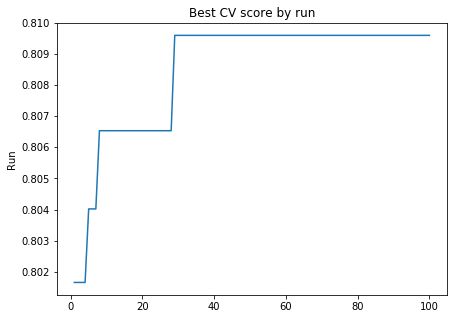

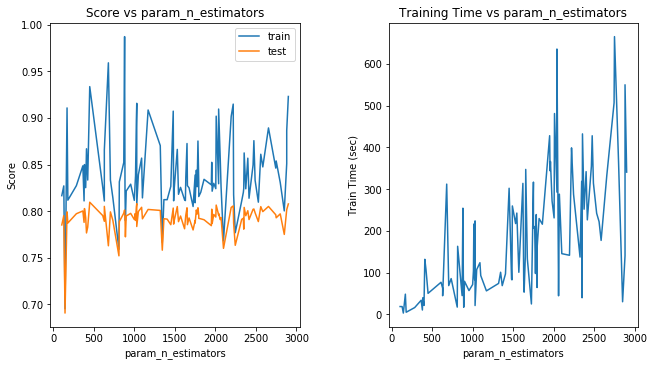

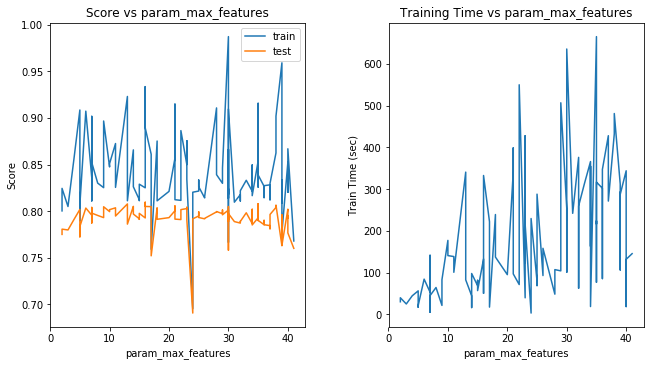

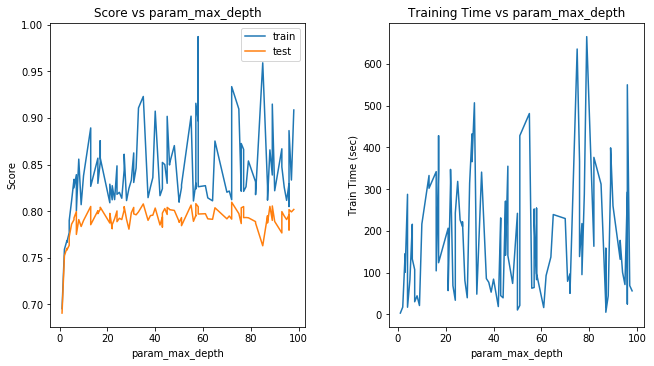

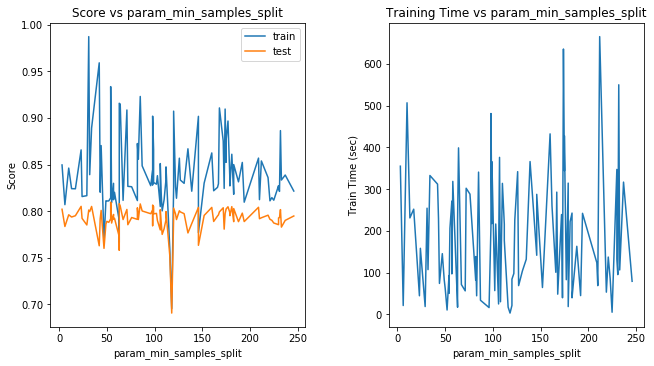

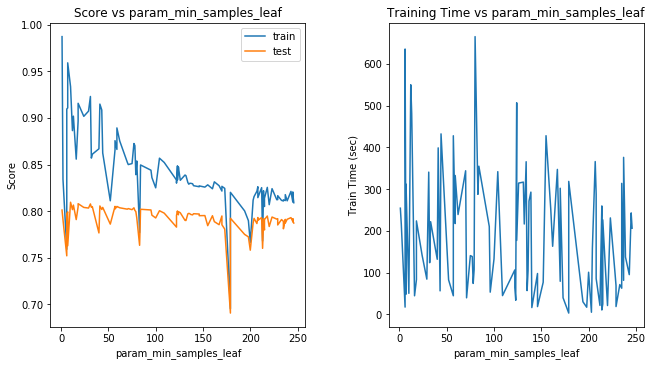

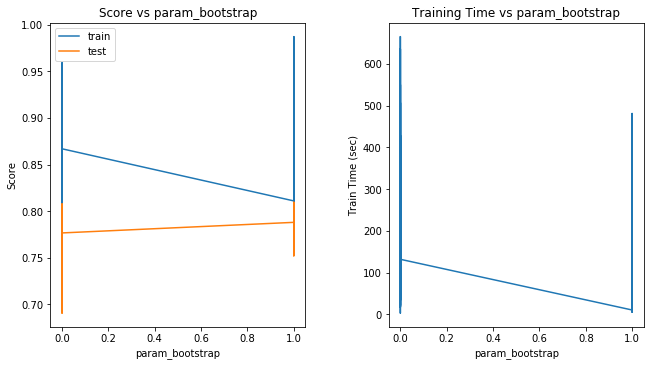

param_n_estimators and param_max_features


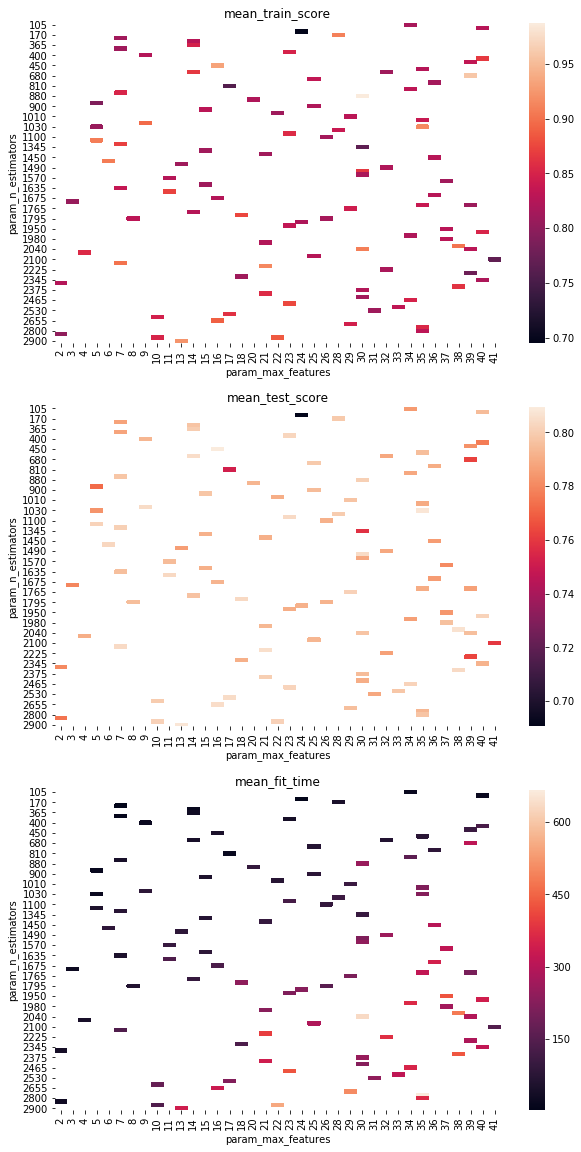


param_n_estimators and param_max_depth


<Figure size 432x288 with 0 Axes>

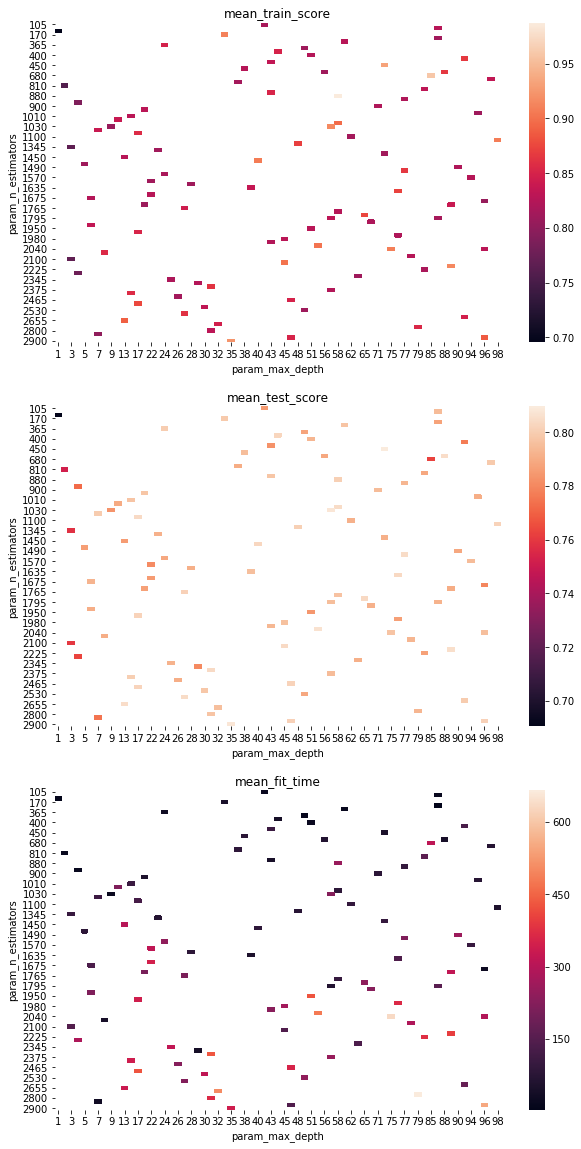


param_n_estimators and param_min_samples_split


<Figure size 432x288 with 0 Axes>

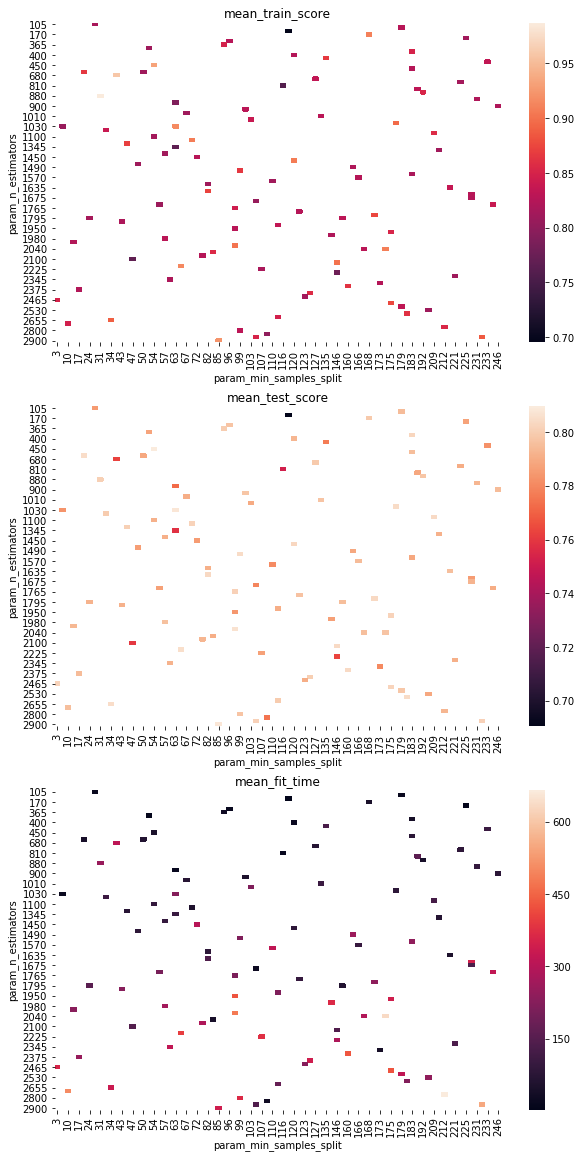


param_n_estimators and param_min_samples_leaf


<Figure size 432x288 with 0 Axes>

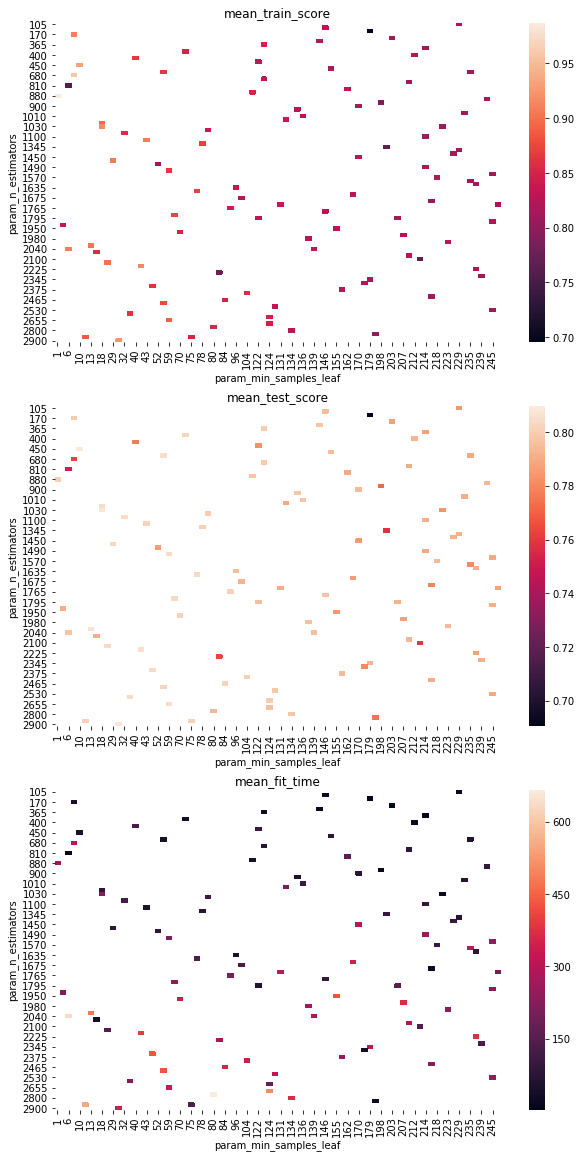


param_n_estimators and param_bootstrap


<Figure size 432x288 with 0 Axes>

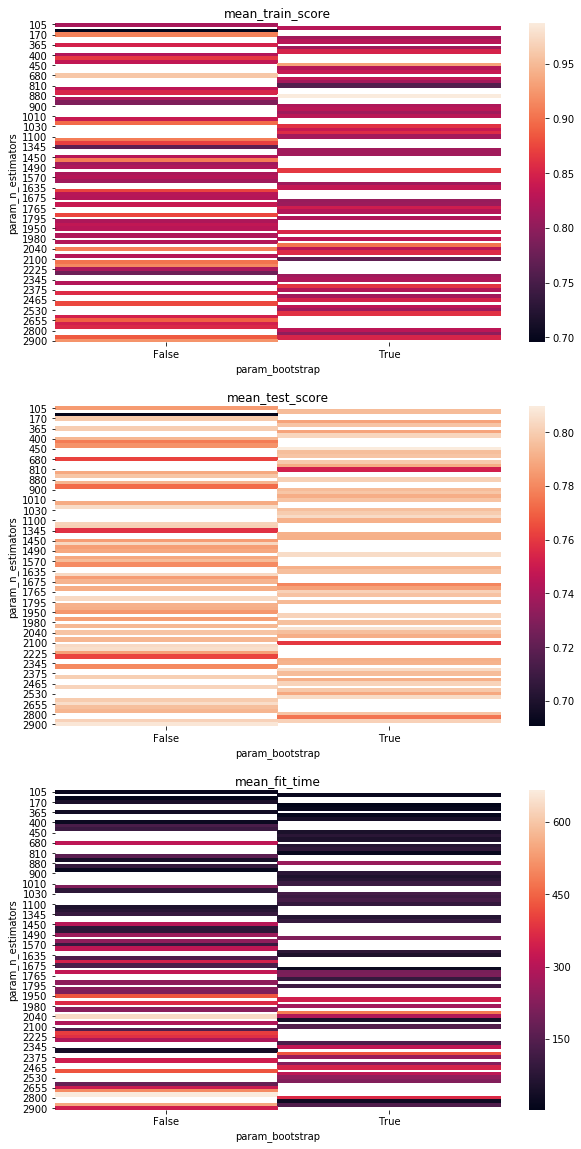


param_max_features and param_max_depth


<Figure size 432x288 with 0 Axes>

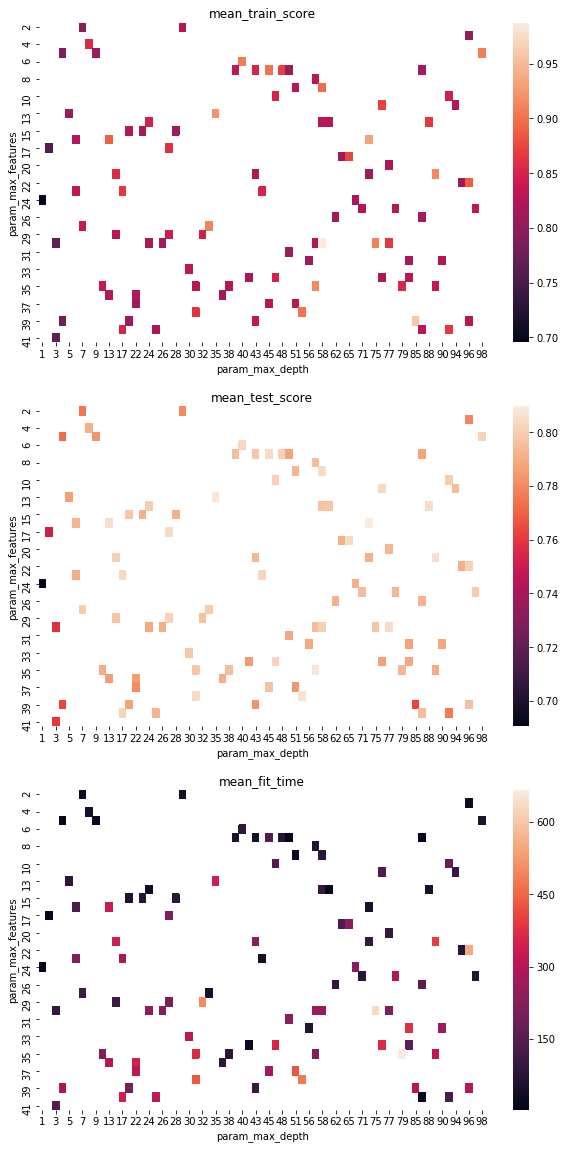


param_max_features and param_min_samples_split


<Figure size 432x288 with 0 Axes>

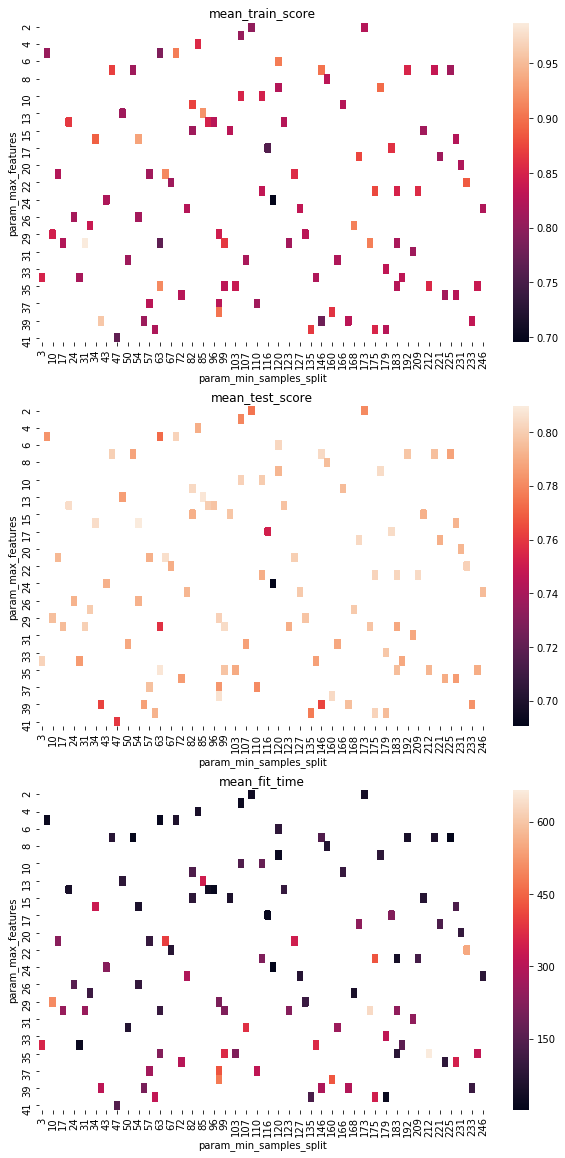


param_max_features and param_min_samples_leaf


<Figure size 432x288 with 0 Axes>

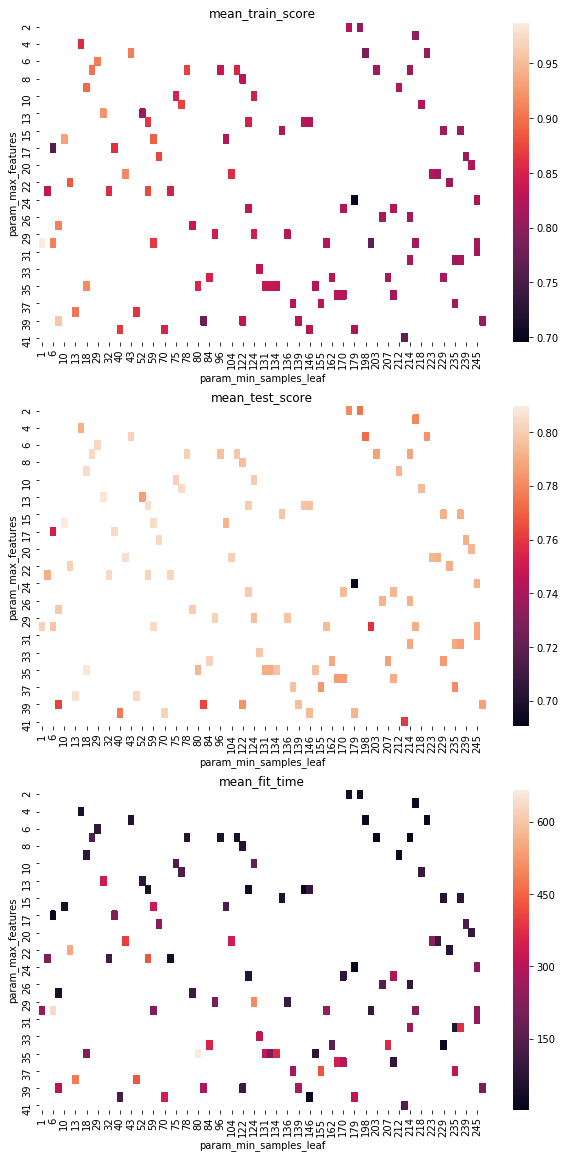


param_max_features and param_bootstrap


<Figure size 432x288 with 0 Axes>

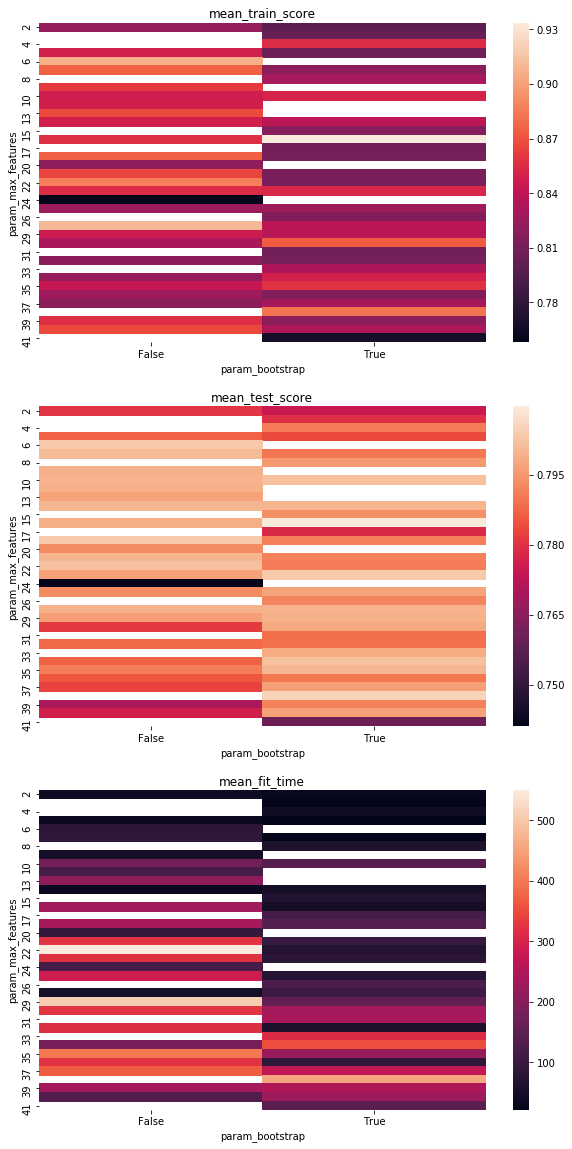


param_max_depth and param_min_samples_split


<Figure size 432x288 with 0 Axes>

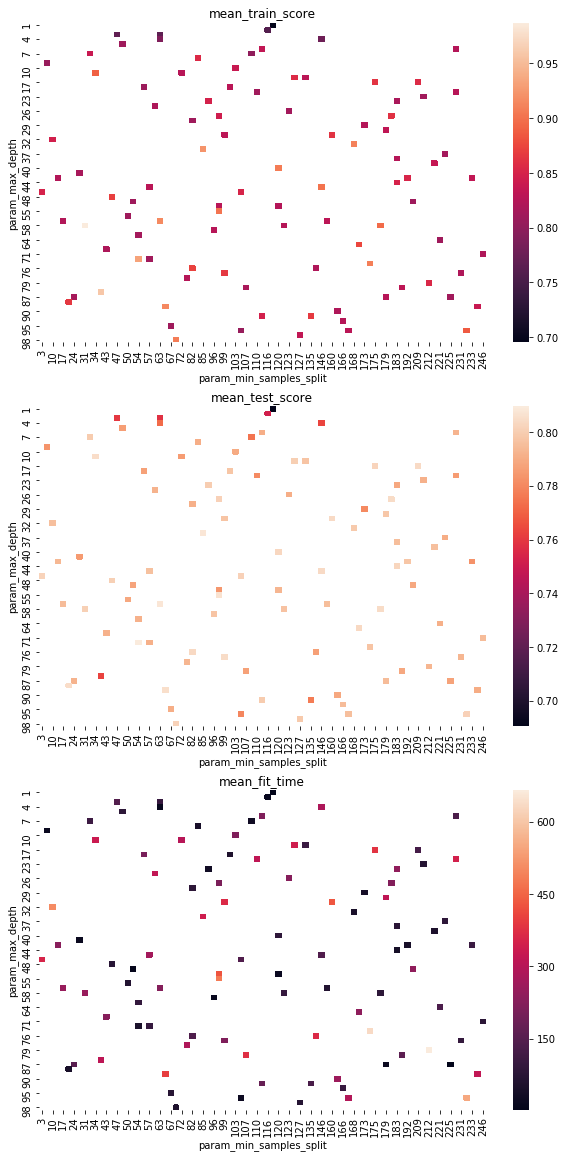


param_max_depth and param_min_samples_leaf


<Figure size 432x288 with 0 Axes>

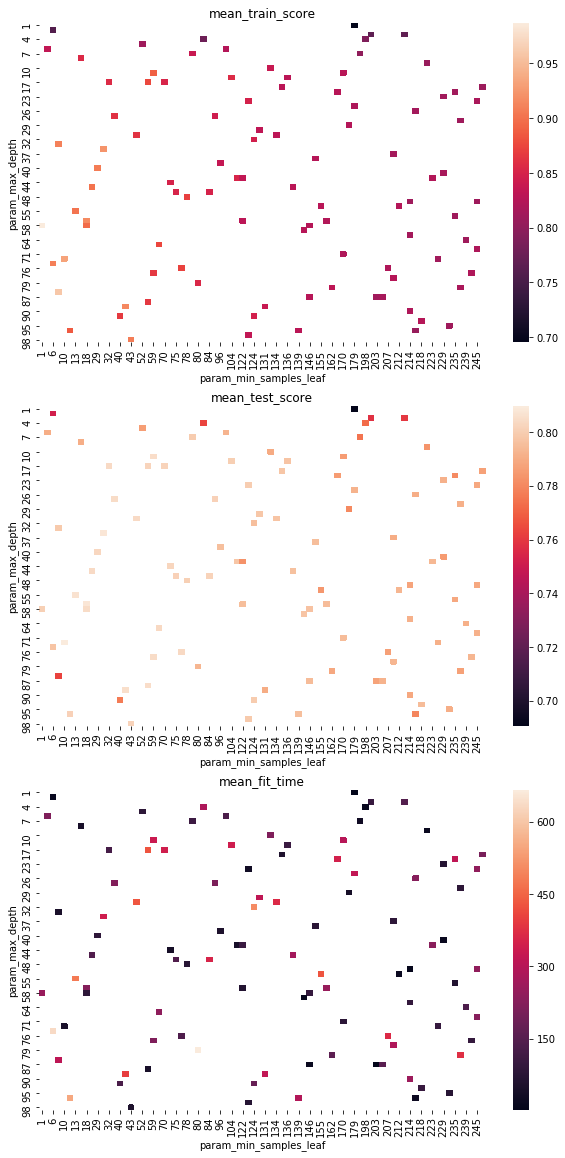


param_max_depth and param_bootstrap


<Figure size 432x288 with 0 Axes>

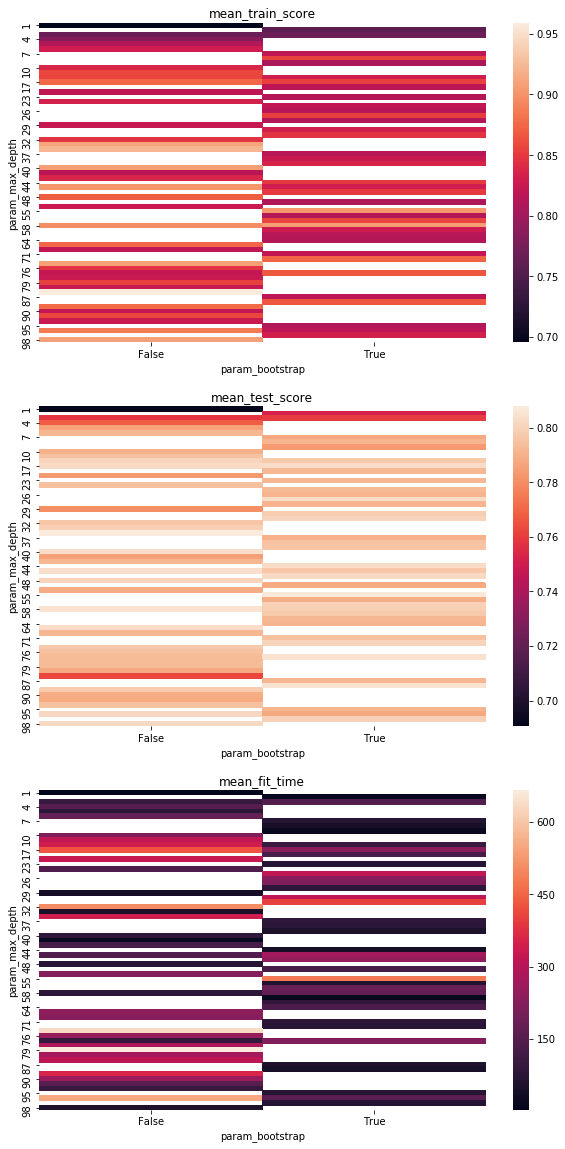


param_min_samples_split and param_min_samples_leaf


<Figure size 432x288 with 0 Axes>

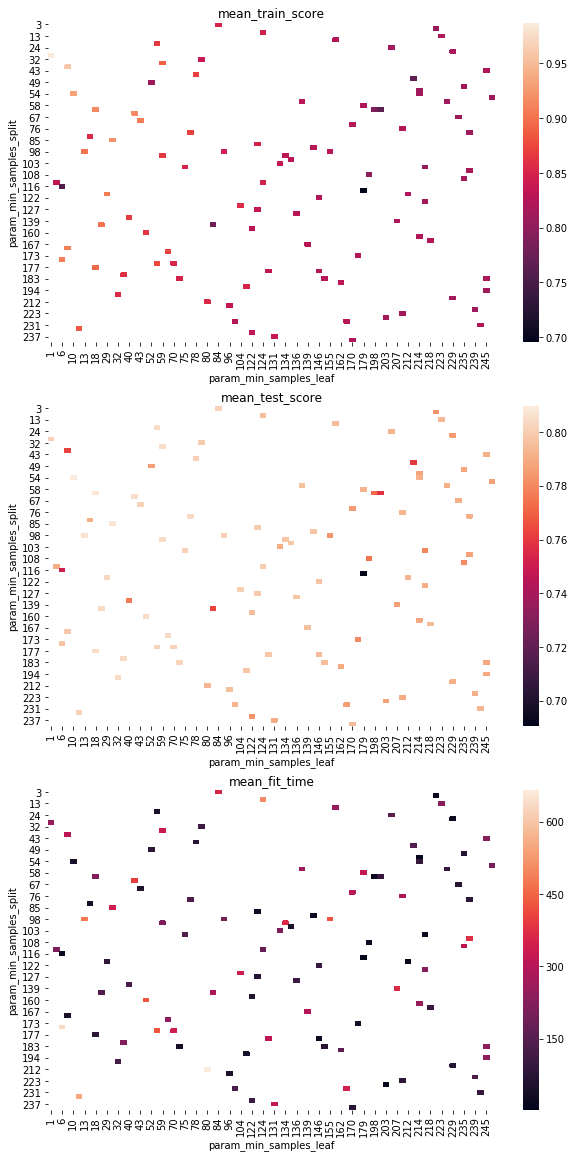


param_min_samples_split and param_bootstrap


<Figure size 432x288 with 0 Axes>

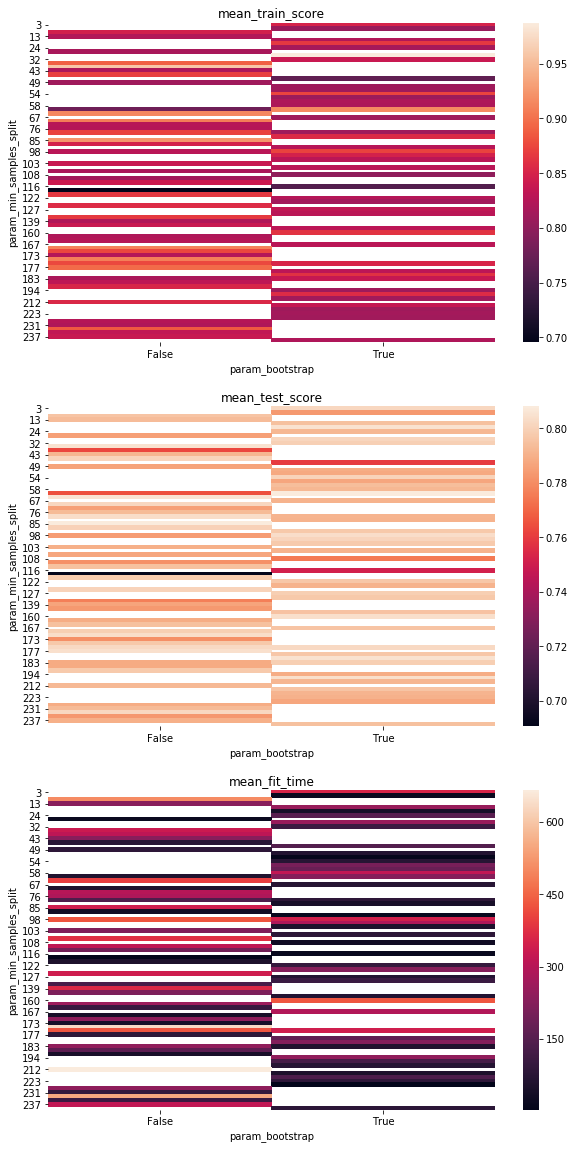


param_min_samples_leaf and param_bootstrap


<Figure size 432x288 with 0 Axes>

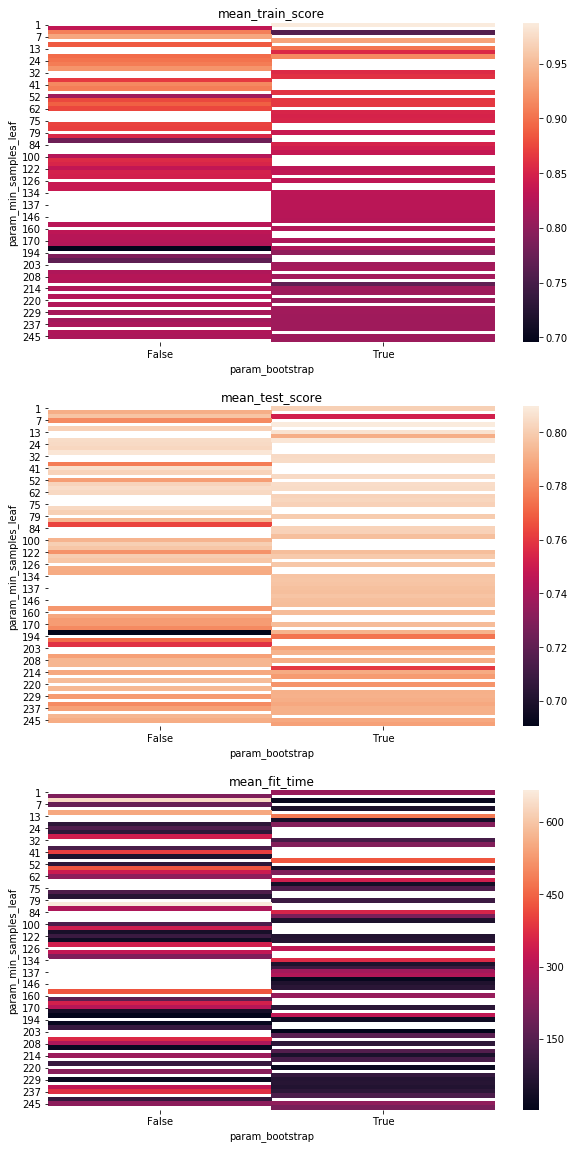

,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_bootstrap,mean_train_score,mean_test_score,mean_fit_time
28,450,16,72,54,10,True,0.933697,0.809589,50.306265
73,1030,35,57,63,18,True,0.915799,0.808044,223.849167
31,2900,13,35,85,31,False,0.923115,0.807752,340.716127
7,2010,38,55,98,13,True,0.901996,0.806530,481.095932
43,2220,21,89,64,41,False,0.914923,0.805598,398.800619
49,630,14,88,23,57,True,0.865781,0.805145,44.512691
72,2655,16,13,34,59,False,0.889358,0.805055,332.622551
12,1530,30,77,99,59,True,0.866293,0.804939,217.483459
91,2560,17,27,181,33,True,0.861099,0.804867,221.986242
10,1025,9,58,177,18,False,0.896773,0.804723,83.021091


<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualise the results to find optimal hyperparameters
rf_results = visualise_results(random_grid=rf_random_grid, random_search_model=rf_random_search_model,
                            training_score='mean_train_score', cv_score='mean_test_score', fit_time='mean_fit_time')
rf_results

## SVM

In [ ]:
# define the grid search parameters
C=list(np.logspace(-4, 5, 10))
gamma=list(np.logspace(-7, 4, 12))
kernel=['linear', 'poly', 'rbf', 'sigmoid']
degree=[1,2,3]

# Create the random grid
svm_random_grid = {'C': C,
                   'kernel': kernel,
                   'degree': degree,
                   'gamma': gamma}

print('--> Grid defined')

--> Grid defined


In [ ]:
# Run the random search model
svm_random_search_model = run_random_search(model=SVC(class_weight='balanced'),
                                        random_grid=svm_random_grid,
                                        scoring='roc_auc', cv=4, n_iter=iterations_per_model, 
                                        X_train=X_train, y_train=y_train)

--> Model defined
--> Random search defined


/Users/James/anaconda3/envs/mimic/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/James/anaconda3/envs/mimic/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/James/anaconda3/envs/mimic/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/James/anaconda3/envs/mimic/lib/python3.6/s

In [ ]:
# Visualise the results to find optimal hyperparameters
svm_results = visualise_results(random_grid=svm_random_grid, random_search_model=svm_random_search_model,
                            training_score='mean_train_score', cv_score='mean_test_score', fit_time='mean_fit_time')
svm_results